In [1]:
# installs
!pip install deepface
!pip install dlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.1 MB/s 
     |████████████████████████████████| 2.3 MB 14.6 MB/s 
     |████████████████████████████████| 87 kB 8.5 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=539256895ef9f22d4c685ed5518614c853e7129a83978e25ce1b87161284b106
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# imports
import dlib
import tarfile
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 6):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


True
0


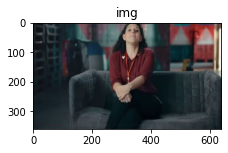

True
1


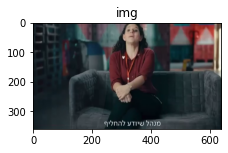

True
2


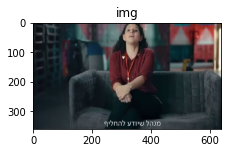

True
3


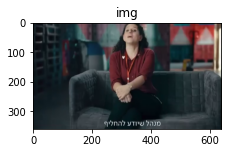

True
4


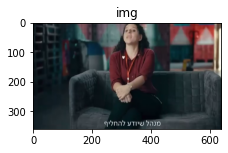

True
5


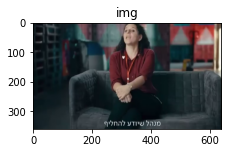

True
6


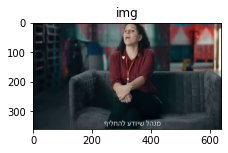

True
7


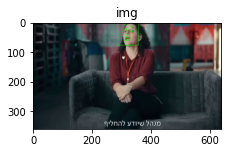

True
8


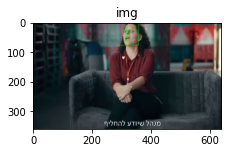

True
9


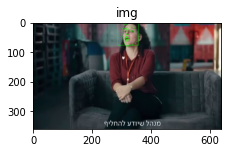

True
10


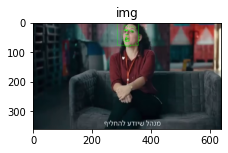

True
11


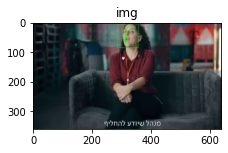

True
12


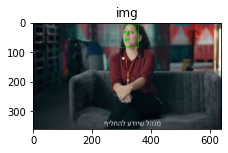

True
13


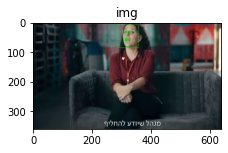

True
14


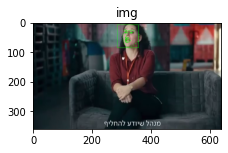

True
15


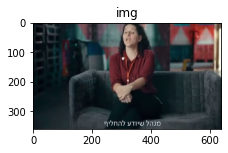

True
16


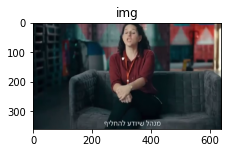

True
17


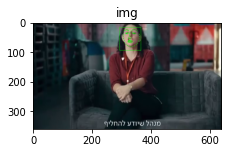

True
18


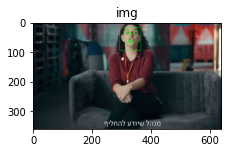

True
19


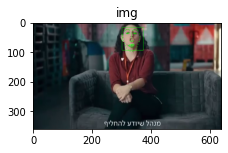

True
20


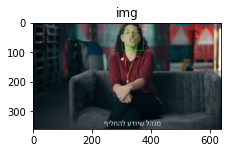

True
21


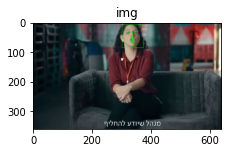

True
22


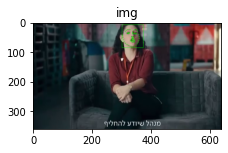

True
23


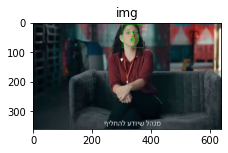

True
24


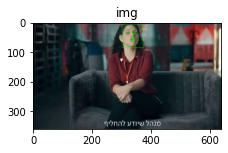

True
25


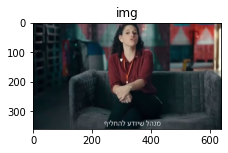

True
26


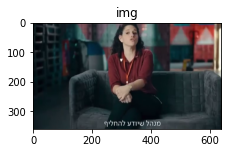

True
27


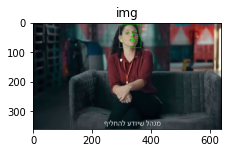

True
28


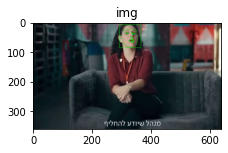

True
29


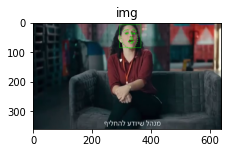

True
30


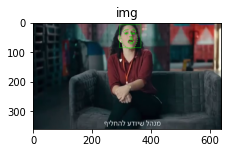

True
31


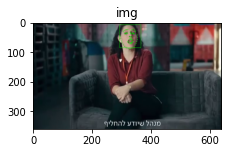

True
32


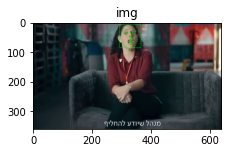

True
33


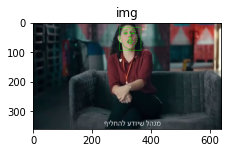

True
34


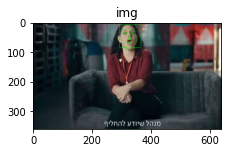

True
35


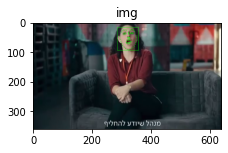

True
36


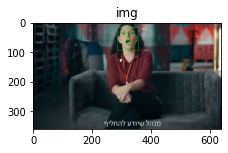

True
37


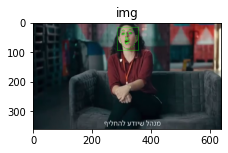

True
38


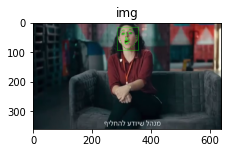

True
39


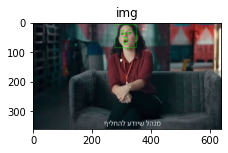

True
40


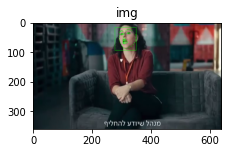

True
41


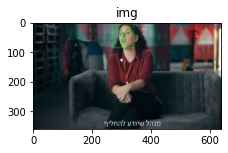

True
42


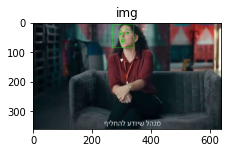

True
43


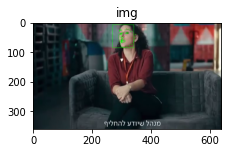

True
44


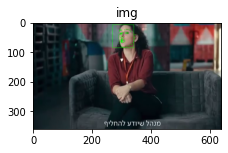

True
45


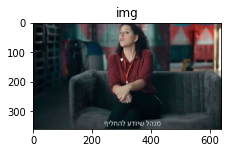

True
46


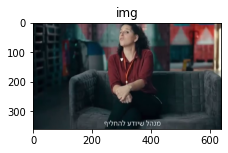

True
47


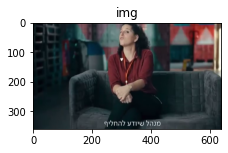

True
48


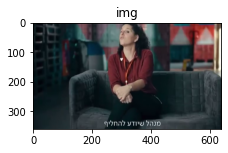

True
49


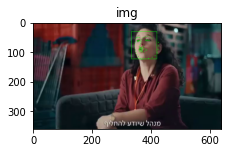

True
50


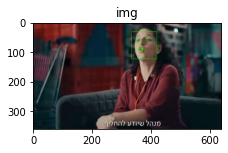

True
51


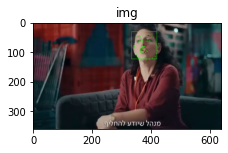

True
52


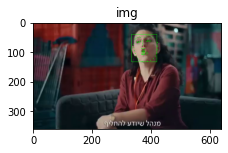

True
53


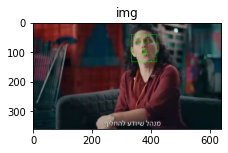

True
54


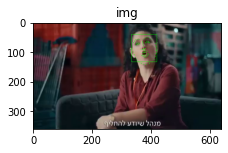

True
55


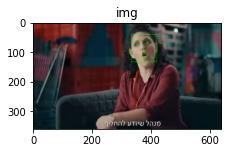

True
56


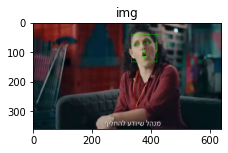

True
57


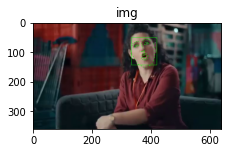

True
58


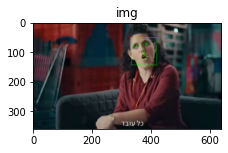

True
59


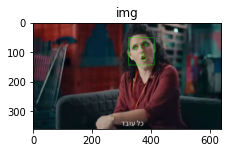

True
60


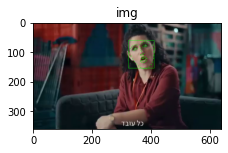

True
61


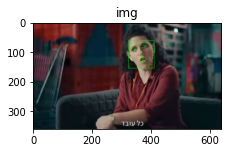

True
62


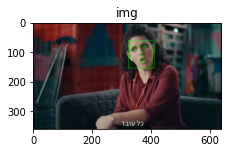

True
63


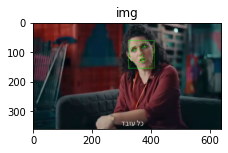

True
64


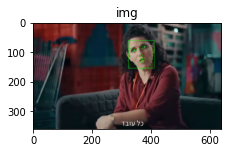

True
65


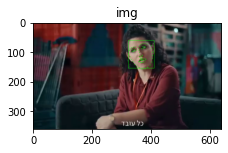

True
66


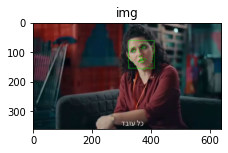

True
67


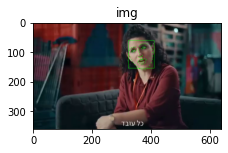

True
68


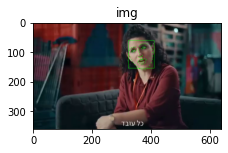

True
69


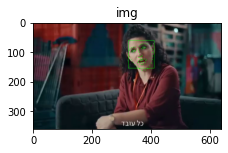

True
70


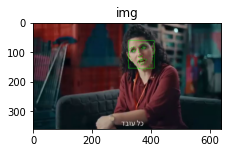

True
71


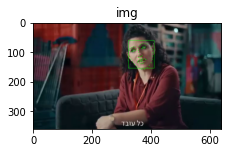

True
72


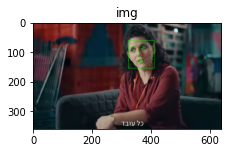

True
73


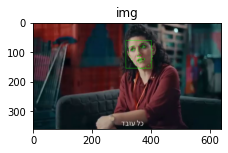

True
74


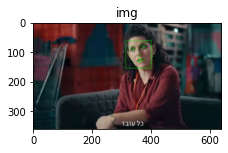

True
75


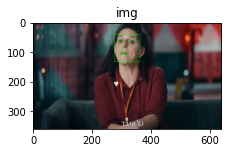

True
76


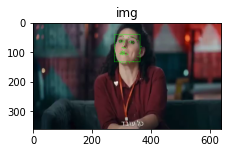

True
77


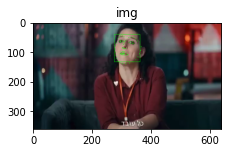

True
78


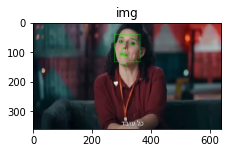

True
79


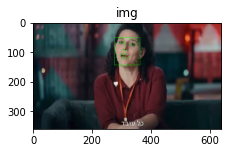

True
80


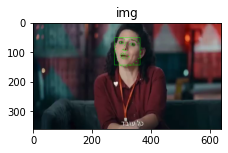

True
81


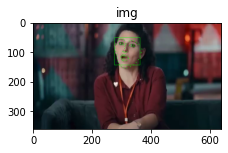

True
82


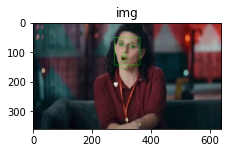

True
83


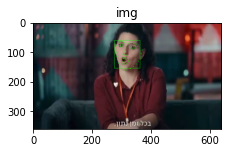

True
84


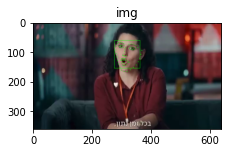

True
85


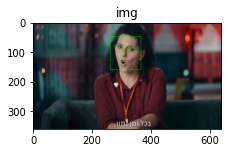

True
86


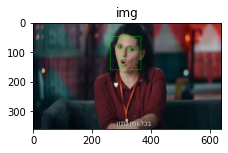

True
87


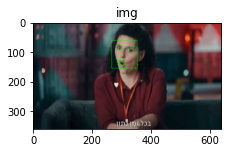

True
88


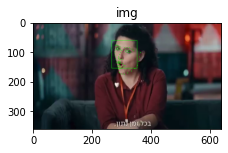

True
89


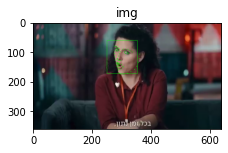

True
90


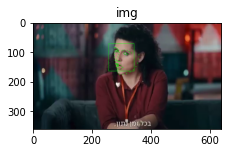

True
91


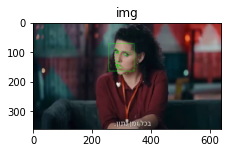

True
92


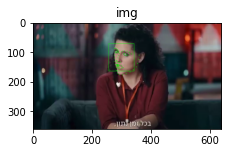

True
93


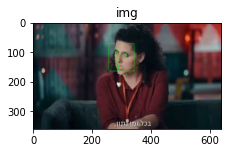

True
94


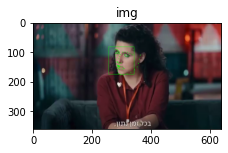

True
95


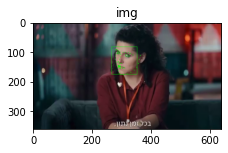

True
96


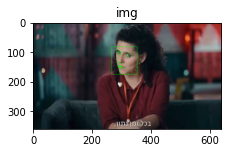

True
97


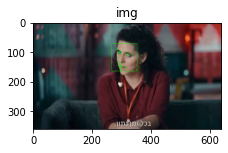

True
98


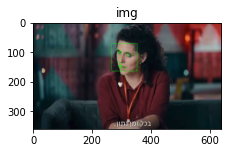

True
99


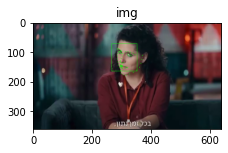

True
100


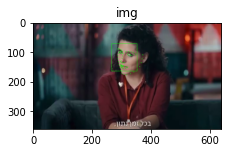

True
101


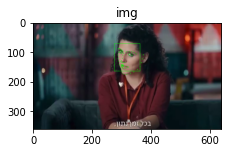

True
102


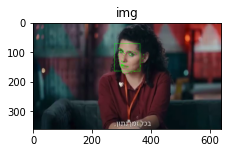

True
103


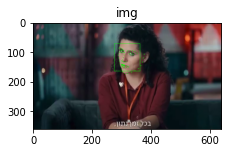

True
104


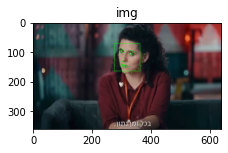

True
105


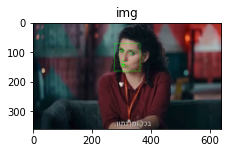

True
106


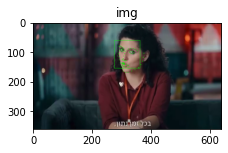

True
107


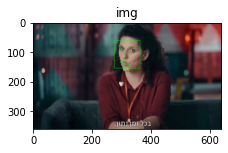

True
108


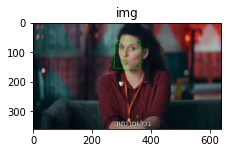

True
109


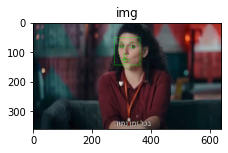

True
110


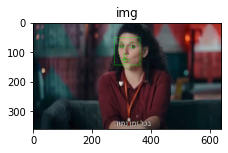

True
111


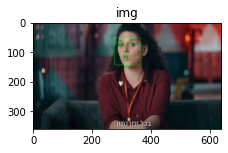

True
112


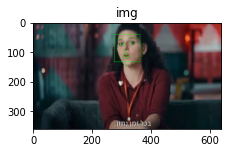

True
113


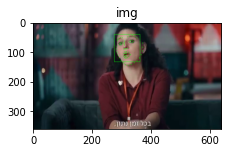

True
114


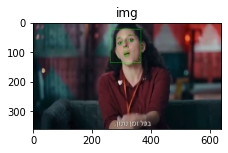

True
115


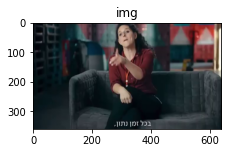

True
116


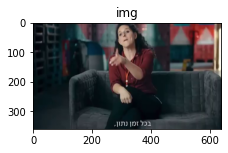

True
117


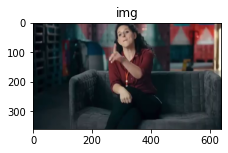

True
118


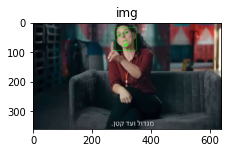

True
119


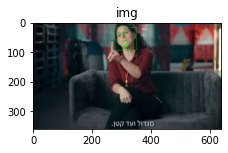

True
120


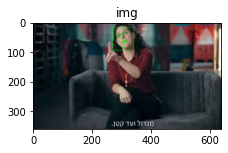

True
121


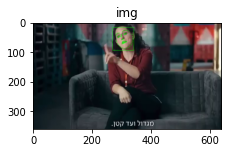

True
122


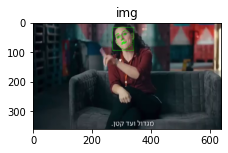

True
123


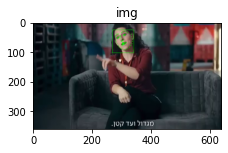

True
124


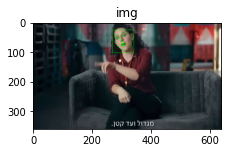

True
125


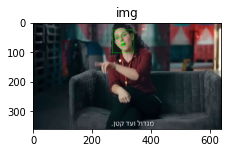

True
126


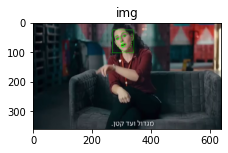

True
127


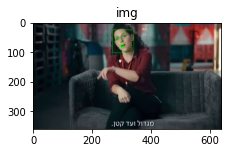

True
128


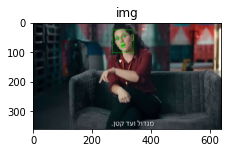

True
129


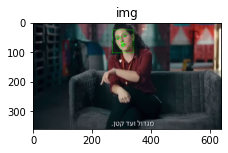

True
130


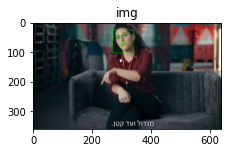

True
131


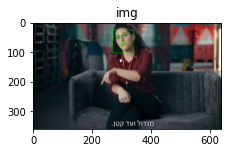

True
132


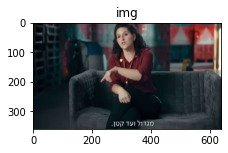

True
133


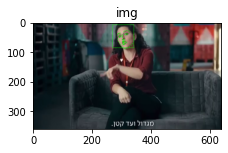

True
134


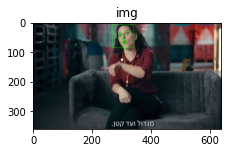

True
135


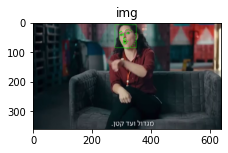

True
136


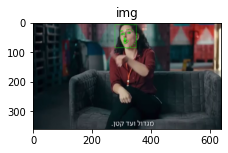

True
137


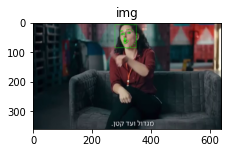

True
138


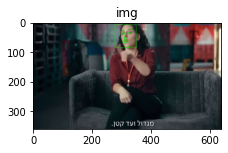

True
139


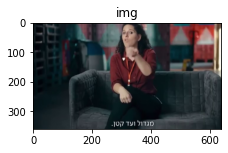

True
140


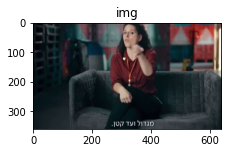

True
141


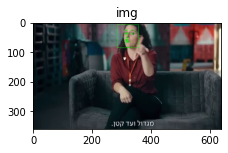

True
142


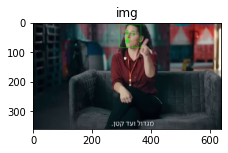

True
143


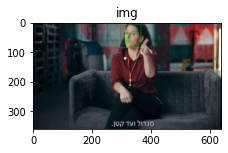

True
144


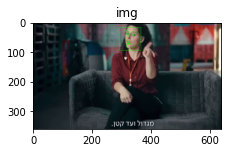

True
145


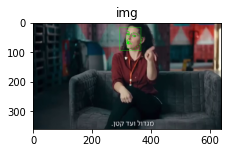

True
146


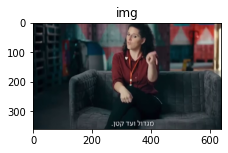

True
147


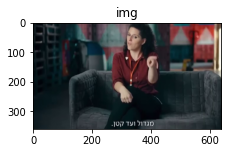

True
148


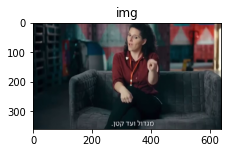

True
149


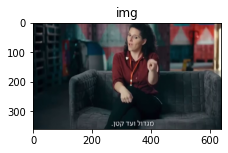

True
150


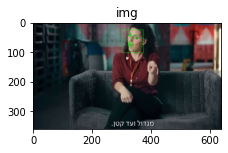

True
151


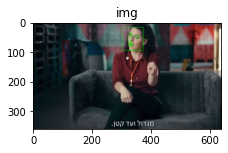

True
152


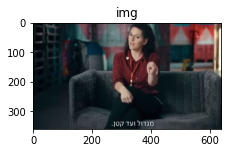

True
153


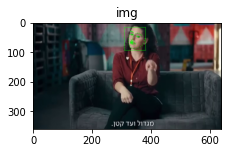

True
154


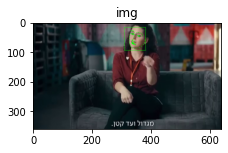

True
155


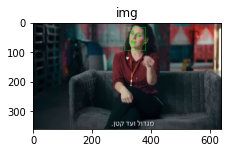

True
156


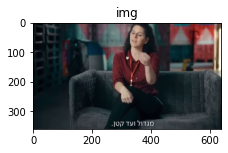

True
157


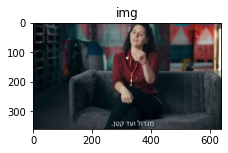

True
158


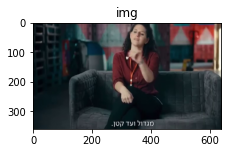

True
159


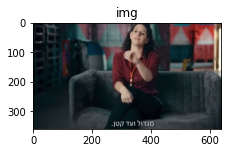

True
160


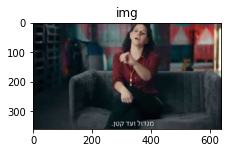

True
161


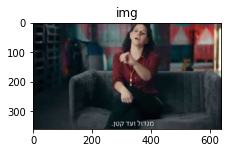

True
162


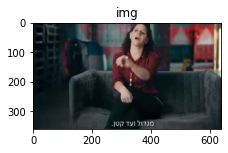

True
163


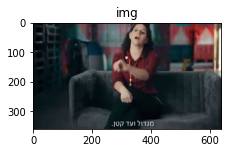

True
164


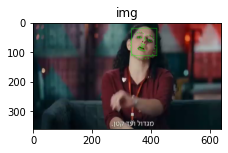

True
165


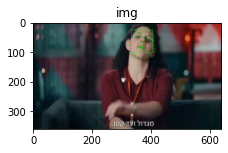

True
166


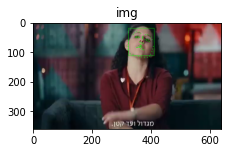

True
167


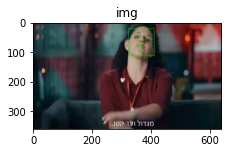

True
168


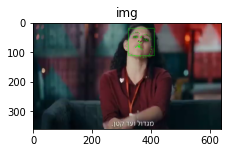

True
169


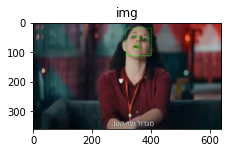

True
170


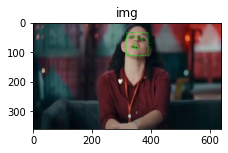

True
171


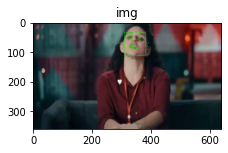

True
172


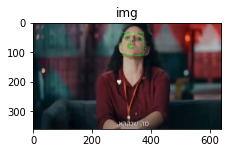

True
173


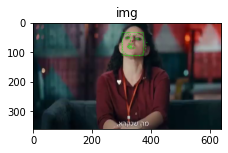

True
174


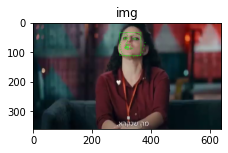

True
175


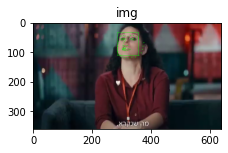

True
176


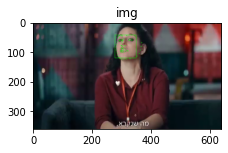

True
177


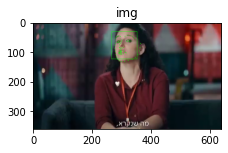

True
178


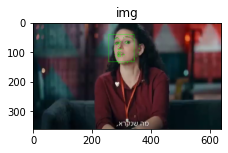

True
179


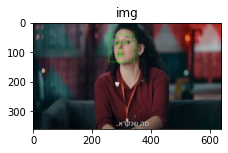

True
180


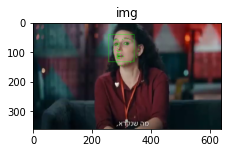

True
181


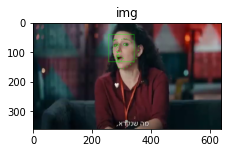

True
182


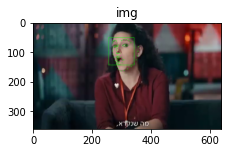

True
183


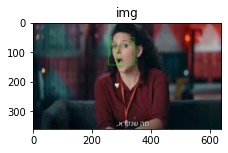

True
184


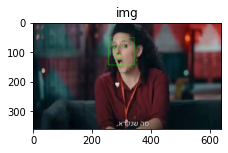

True
185


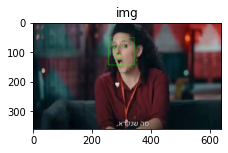

True
186


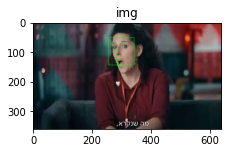

True
187


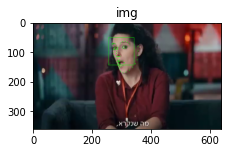

True
188


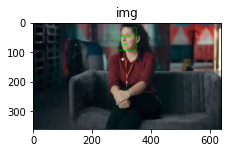

True
189


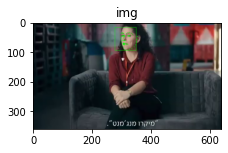

True
190


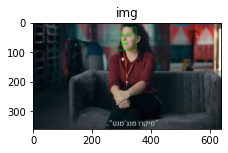

True
191


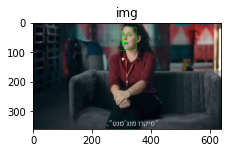

True
192


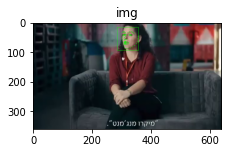

True
193


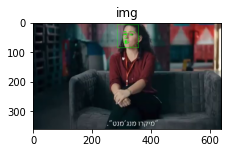

True
194


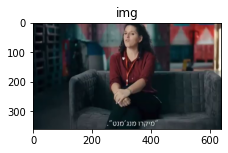

True
195


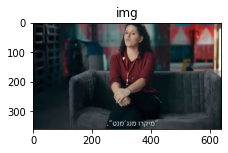

True
196


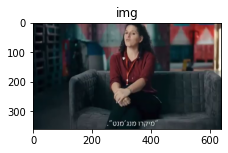

True
197


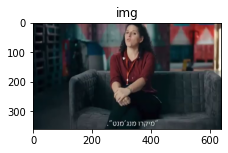

True
198


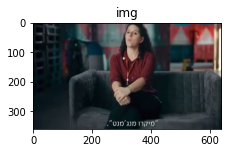

True
199


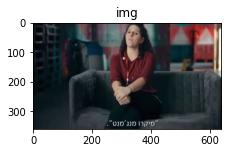

True
200


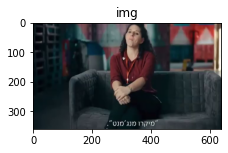

True
201


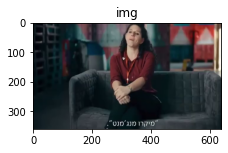

True
202


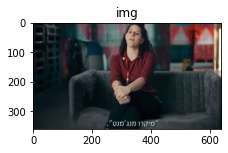

True
203


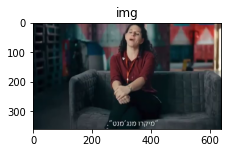

True
204


KeyboardInterrupt: ignored

In [8]:
from imutils import face_utils

p = "/content/gdrive/MyDrive/ml/Modern_Computer_Vision/face_recognition/deepface/shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

#points to your extracted faces
cap = cv2.VideoCapture(r'/content/gdrive/MyDrive/ml/Modern_Computer_Vision/face_recognition/kupa_rashit.mp4')
frame_count = 0

# Get the height and width of the frame (required to be an integer)
w = int(cap.get(3)) 
h = int(cap.get(4))
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('res.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))


for frame in range(5000000):
  ret, img = cap.read()
  print(ret)
  if ret:
    print(frame_count)
    img = cv2.copyMakeBorder(img, 0, 0,0, 0, cv2.BORDER_CONSTANT, value=[0,0,0])
    # Converting image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frame_count+=1
    # Get faces 
    rects = detector(gray, 0)
    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(img, (x, y), 1, (0, 255, 0), -1)


    imshow('img',cv2.resize(img, (640, 360)))
    # Write the frame into the file 'output.avi'
    out.write(img)

  else:
    break

cap.release()
out.release()